In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# SVM

## Centralized


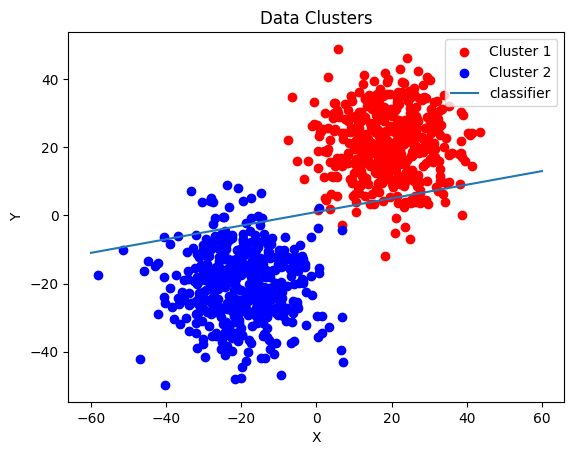

In [364]:

# Set the random seed for reproducibility
np.random.seed(123)

# Generate the data clusters
num_samples = 900  # Total number of samples
centers = [[20, 20], [-20, -20]]  # Centers of the clusters
cluster_std = [10, 10]  # Standard deviation of each cluster

X, y = make_blobs(n_samples=num_samples, centers=centers, cluster_std=cluster_std,random_state=20)
y = (y*2-1)*-1
# Separate the data into two clusters
cluster_1 = X[y == 1]
cluster_2 = X[y == -1]
# classifier
a = np.array([-2.,10.])
b = np.array([-10.])
x_plot = np.linspace(-60,60,100)
y_plot = (-b-a[0]*x_plot)/a[1]
# Plot the clusters
plt.scatter(cluster_1[:, 0], cluster_1[:, 1], c='red', label='Cluster 1')
plt.scatter(cluster_2[:, 0], cluster_2[:, 1], c='blue', label='Cluster 2')
plt.plot(x_plot, y_plot, label='classifier')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Data Clusters')
plt.legend()
plt.show()

In [365]:
def f_cost(a, b):
    svm_error = 1 - y * (X @ a + b)
    svm_error = svm_error[svm_error > 0].sum()
    regularization_term = (a[0] ** 2 + a[1] ** 2 + b**2)
    return svm_error + regularization_term/10

In [366]:
def compute_gradient(X, f_for_grad):
    N_dim = X.shape[0]
    gradient_vector = np.zeros_like(X)
    h = 1e-3
    for i in range(N_dim):
        x_plus_h = X.copy()
        x_plus_h[i] += h

        x_minus_h = X.copy()
        x_minus_h[i] -= h

        gradient_vector[i] = (
            f_for_grad(x_plus_h[:-1], x_plus_h[-1])
            - f_for_grad(x_minus_h[:-1], x_minus_h[-1])
        ) / (2 * h)
    return gradient_vector

Text(0.5, 0, 'iteration')

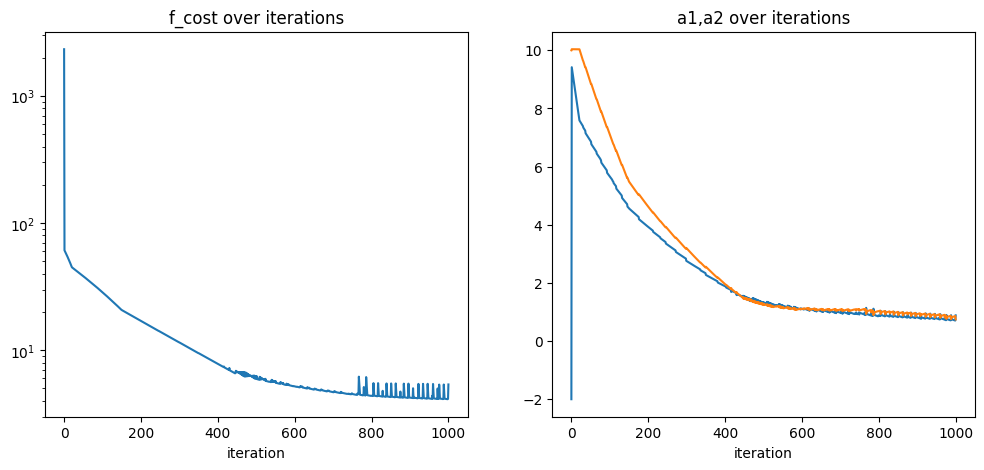

In [369]:
a_list = [a.copy()]
b_list = [b.copy()]
f_list = [f_cost(a,b)]
a_current = a_list[-1].copy()
b_current = b_list[-1].copy()

for i in range(1000):
    grad_input = np.concatenate((a_current,b_current))
    gradient_vector = compute_gradient(grad_input, f_cost)
    a_current = a_current - 0.01*gradient_vector[:-1]
    b_current = b_current - 0.01*gradient_vector[-1]
    
    a_list.append(a_current.copy())
    b_list.append(b_current.copy())
    f_list.append(f_cost(a_current,b_current))
fig, axes = plt.subplots(1, 2, figsize=(12,5))    
axes[0].semilogy(f_list);
axes[0].title.set_text('f_cost over iterations')
axes[0].set_xlabel('iteration')
axes[1].plot(a_list);
axes[1].title.set_text('a1,a2 over iterations')
axes[1].set_xlabel('iteration')

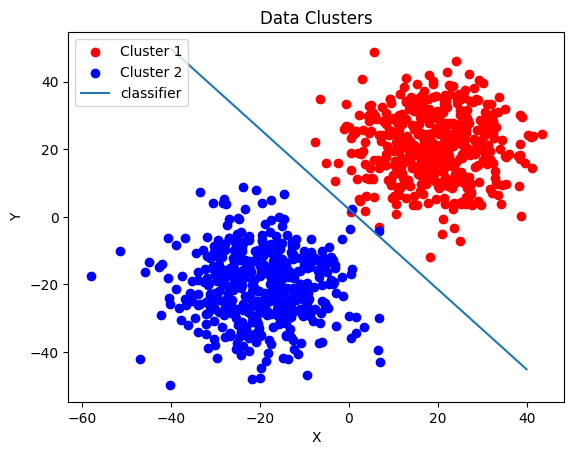

In [370]:
x_plot = np.linspace(-40,40,2)
y_plot = (-b_current-a_current[0]*x_plot)/a_current[1]

plt.scatter(cluster_1[:, 0], cluster_1[:, 1], c='red', label='Cluster 1')
plt.scatter(cluster_2[:, 0], cluster_2[:, 1], c='blue', label='Cluster 2')
plt.plot(x_plot, y_plot, label='classifier')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Data Clusters')
plt.legend()
plt.show()

## Primal Decomposition

In [421]:
n_agent = 5
a = np.random.normal(size=(n_agent, 2))
b = np.random.normal(size=(n_agent, 1))

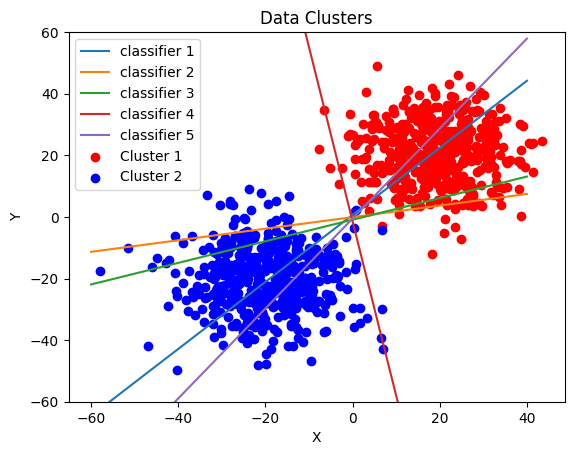

In [422]:
# Set the random seed for reproducibility
np.random.seed(123)

# Generate the data clusters
num_samples = 900  # Total number of samples
centers = [[20, 20], [-20, -20]]  # Centers of the clusters
cluster_std = [10, 10]  # Standard deviation of each cluster

X, y = make_blobs(n_samples=num_samples, centers=centers, cluster_std=cluster_std,random_state=20)
y = (y*2-1)*-1
# Separate the data into two clusters
cluster_1 = X[y == 1]
cluster_2 = X[y == -1]
# classifier
for i in range(n_agent):
    x_plot = np.linspace(-60,40,100)
    y_plot = (-b[i]-a[i][0]*x_plot)/a[i][1]
    plt.plot(x_plot, y_plot, label=f'classifier {i+1}')
# Plot the clusters
plt.scatter(cluster_1[:, 0], cluster_1[:, 1], c='red', label='Cluster 1')
plt.scatter(cluster_2[:, 0], cluster_2[:, 1], c='blue', label='Cluster 2')
plt.xlabel('X')
plt.ylabel('Y')
# plt.xlim([-5,5])
plt.ylim([-60.,60])
plt.title('Data Clusters')
plt.legend()
plt.show()
X = X.reshape(n_agent,-1,2)
y = y.reshape(n_agent,-1)

In [423]:
def f_cost(a, b, n):
    svm_error = 1 - y[n] * (X[n] @ a + b)
    svm_error = svm_error[svm_error > 0].sum()
    regularization_term = (a[0] ** 2 + a[1] ** 2 + b**2)
    return svm_error + regularization_term/10

In [424]:
def compute_gradient(X, f_for_grad, n):
    N_dim = X.shape[0]
    gradient_vector = np.zeros_like(X)
    h = 1e-3
    for i in range(N_dim):
        x_plus_h = X.copy()
        x_plus_h[i] += h

        x_minus_h = X.copy()
        x_minus_h[i] -= h

        gradient_vector[i] = (
            f_for_grad(x_plus_h[:-1], x_plus_h[-1], n)
            - f_for_grad(x_minus_h[:-1], x_minus_h[-1], n)
        ) / (2 * h)
    return gradient_vector

In [482]:
a_list = [a.copy()]
b_list = [b.copy()]
f_list = [f_cost(a[0], b[0],0)]
a_current = a_list[-1].copy()
b_current = b_list[-1].copy()

for i in range(1,200):
    for j in range(n_agent):
        grad_input = np.concatenate((a_current[j], b_current[j]))
        gradient_vector = compute_gradient(grad_input, f_cost, j)
        a_current[j] = a_current[j] - (0.005/i**0.5)*gradient_vector[:-1]
        b_current[j] = b_current[j] - (0.005/i**0.5)*gradient_vector[-1]

    # a_current = np.tile(a_current.mean(axis=0),(3,1))
    # b_current = np.tile(b_current.mean(axis=0),(3,1))
    a_list.append(a_current.copy())
    b_list.append(b_current.copy())
    f_list.append(f_cost(a_current[0], b_current[0],0))
        

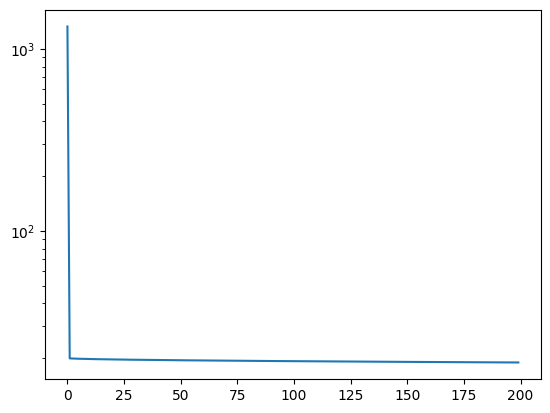

In [483]:
plt.semilogy(f_list,label = "constant lr")


In [484]:
decay_sqrt_k = f_list

Text(0.5, 0, 'iteration')

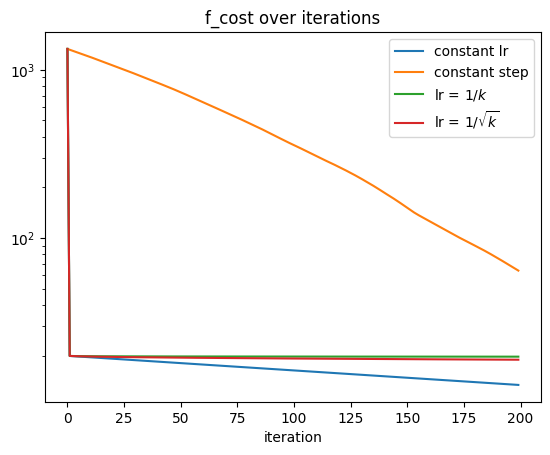

In [487]:
plt.semilogy(const_lr,label = "constant lr")
plt.semilogy(const_step,label = "constant step")
plt.semilogy(decay_k,label = "lr = $1/k$")
plt.semilogy(decay_sqrt_k,label = "lr = $1/\sqrt{k}$")

plt.legend()
plt.title('f_cost over iterations')
plt.xlabel('iteration')

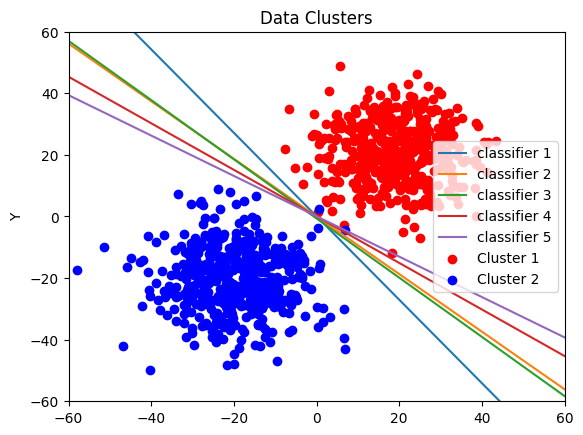

In [488]:
for i in range(n_agent):
    x_plot = np.linspace(-60,60,100)
    y_plot = (-b_current[i]-a_current[i][0]*x_plot)/a_current[i][1]
    plt.plot(x_plot, y_plot, label=f'classifier {i+1}')
plt.scatter(cluster_1[:, 0], cluster_1[:, 1], c='red', label='Cluster 1')
plt.scatter(cluster_2[:, 0], cluster_2[:, 1], c='blue', label='Cluster 2')
plt.ylabel('Y')
plt.xlim([-60.,60])
plt.ylim([-60.,60])
plt.title('Data Clusters')
plt.legend()
plt.show()

In [491]:
from PIL import Image

# Create a list of plots to be included in the GIF
plots = []

# Generate and save each plot
for i in range(20):
    # Generate your plot here (replace this with your own plotting code)
    fig, ax = plt.subplots()
    for j in range(n_agent):
        x_plot = np.linspace(-60,60,100)
        y_plot = (-b_list[i*10][j]-a_list[i*10][j][0]*x_plot)/a_list[i*10][j][1]
        ax.plot(x_plot, y_plot, label=f'classifier {j+1}')
    ax.scatter(cluster_1[:, 0], cluster_1[:, 1], c='red', label='Cluster 1')
    ax.scatter(cluster_2[:, 0], cluster_2[:, 1], c='blue', label='Cluster 2')
    plt.ylabel('Y')
    plt.ylabel('X')
    plt.xlim([-60.,60])
    plt.ylim([-60.,60])
    plt.title(f'Data Clusters and classifiers at iteration {i*10+1}')
    plt.legend()
        
    # Save the plot as an image file
    filename = f'primal_plot_{i*10}.png'
    plt.savefig(filename)
    
    # Close the plot to release memory
    plt.close()
    
    # Append the saved plot to the list
    plots.append(filename)

# Create a GIF from the saved plots
images = [Image.open(p) for p in plots]
images[0].save('gifs/primal.gif', save_all=True, append_images=images[1:], optimize=False, duration=500, loop=0)

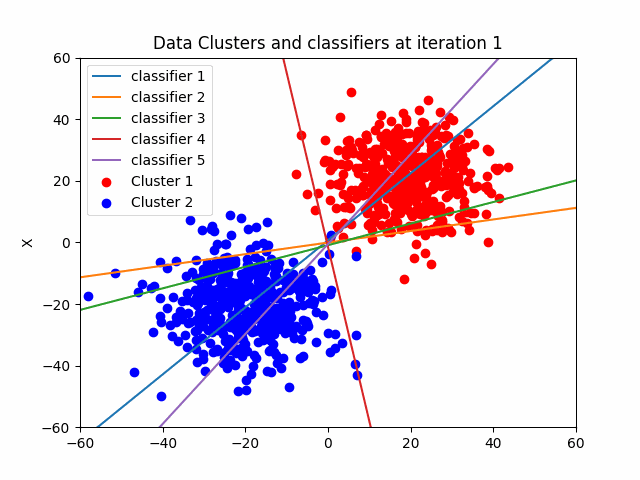

In [492]:
from IPython.display import Image, display

# Display the GIF
display(Image(filename='gifs/primal.gif'))

## ADMM

In [495]:
n_agent = 5
rho = 50
z = np.random.normal(size=(3))
mue = np.random.normal(size=(n_agent, 3))
a = np.random.normal(size=(n_agent, 2))
b = np.random.normal(size=(n_agent, 1))

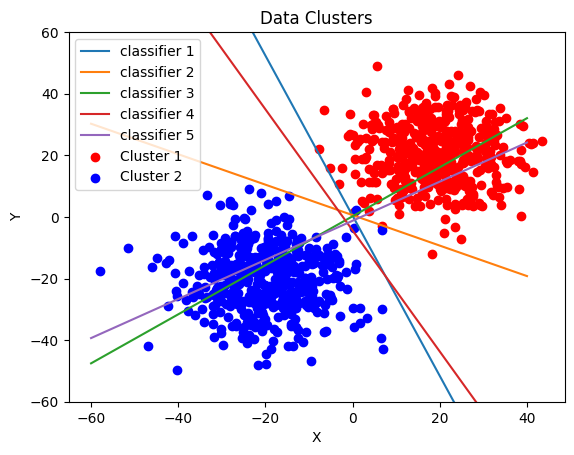

In [496]:
# Set the random seed for reproducibility
np.random.seed(123)

# Generate the data clusters
num_samples = 900  # Total number of samples
centers = [[20, 20], [-20, -20]]  # Centers of the clusters
cluster_std = [10, 10]  # Standard deviation of each cluster

X, y = make_blobs(n_samples=num_samples, centers=centers, cluster_std=cluster_std,random_state=20)
y = (y*2-1)*-1
# Separate the data into two clusters
cluster_1 = X[y == 1]
cluster_2 = X[y == -1]
# classifier
for i in range(n_agent):
    x_plot = np.linspace(-60,40,100)
    y_plot = (-b[i]-a[i][0]*x_plot)/a[i][1]
    plt.plot(x_plot, y_plot, label=f'classifier {i+1}')
# Plot the clusters
plt.scatter(cluster_1[:, 0], cluster_1[:, 1], c='red', label='Cluster 1')
plt.scatter(cluster_2[:, 0], cluster_2[:, 1], c='blue', label='Cluster 2')
plt.xlabel('X')
plt.ylabel('Y')
# plt.xlim([-5,5])
plt.ylim([-60.,60])
plt.title('Data Clusters')
plt.legend()
plt.show()
X = X.reshape(n_agent,-1,2)
y = y.reshape(n_agent,-1)

In [497]:
def f_cost(a, b, n):
    svm_error = 1 - y[n] * (X[n] @ a + b)
    svm_error = svm_error[svm_error > 0].sum()
    regularization_term = (a[0] ** 2 + a[1] ** 2 + b**2)
    return svm_error + regularization_term/10

In [498]:
def compute_gradient(X, f_for_grad, mue, z, n):
    N_dim = X.shape[0]
    gradient_vector = np.zeros_like(X)
    h = 1e-3
    for i in range(N_dim):
        x_plus_h = X.copy()
        x_plus_h[i] += h

        x_minus_h = X.copy()
        x_minus_h[i] -= h

        gradient_vector[i] = (
            f_for_grad(x_plus_h, mue, z, n) - f_for_grad(x_minus_h, mue, z, n)
        ) / (2 * h)
    return gradient_vector

In [500]:
def lagrangian(X, mue, z, n):
    f_error = f_cost(X[:-1],X[-1], n)
    
    lagrangian = mue*(X-z)
    augmnented_lagrangian = (rho/2)*(X-z)**2
    
    return f_error + lagrangian.sum() + augmnented_lagrangian.sum()
        

In [501]:
a_list = [a.copy()]
b_list = [b.copy()]
mue_list = [mue.copy()]
z_list = [z.copy()]
f_list = [f_cost(a[0], b[0], 0)]

a_current = a_list[-1].copy()
b_current = b_list[-1].copy()
mue_current = mue_list[-1].copy()
z_current = z_list[-1].copy()

for i in range(200):
    for j in range(n_agent):
        grad_input = np.concatenate((a_current[j], b_current[j]))
        gradient_vector = compute_gradient(
            grad_input, lagrangian, mue_current[j], z_current, j
        )
        a_current[j] = a_current[j] - 0.005 * gradient_vector[:-1]
        b_current[j] = b_current[j] - 0.005 * gradient_vector[-1]

    all_Xs = np.concatenate((a_current, b_current), axis=1)
    z_current = (1 / n_agent) * (all_Xs + mue_current / rho).sum(axis=0)
    mue_current = mue_current + rho*(all_Xs-z_current)


    a_list.append(a_current.copy())
    b_list.append(b_current.copy())
    f_list.append(f_cost(a_current[0], b_current[0], 0))

Text(0.5, 1.0, 'f_cost value over iterations')

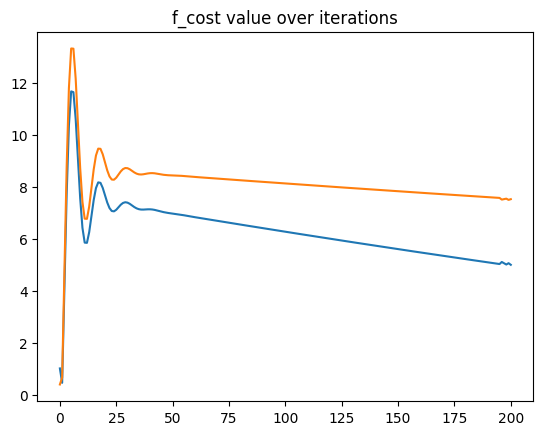

In [502]:
plt.plot(np.array(a_list)[:,0])
plt.title('f_cost value over iterations')

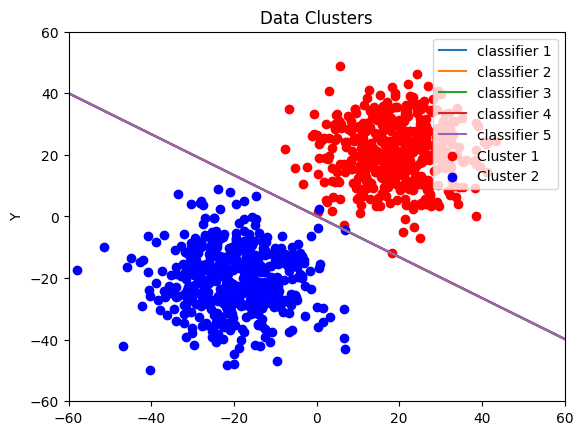

In [503]:
for i in range(n_agent):
    x_plot = np.linspace(-60,60,100)
    y_plot = (-b_current[i]-a_current[i][0]*x_plot)/a_current[i][1]
    plt.plot(x_plot, y_plot, label=f'classifier {i+1}')
plt.scatter(cluster_1[:, 0], cluster_1[:, 1], c='red', label='Cluster 1')
plt.scatter(cluster_2[:, 0], cluster_2[:, 1], c='blue', label='Cluster 2')
plt.ylabel('Y')
plt.xlim([-60.,60])
plt.ylim([-60.,60])
plt.title('Data Clusters')
plt.legend()
plt.show()

In [416]:
from PIL import Image

# Create a list of plots to be included in the GIF
plots = []

# Generate and save each plot
for i in range(20):
    # Generate your plot here (replace this with your own plotting code)
    fig, ax = plt.subplots()
    for j in range(n_agent):
        x_plot = np.linspace(-60,60,100)
        y_plot = (-b_list[i*10][j]-a_list[i*10][j][0]*x_plot)/a_list[i*10][j][1]
        ax.plot(x_plot, y_plot, label=f'classifier {j+1}')
    ax.scatter(cluster_1[:, 0], cluster_1[:, 1], c='red', label='Cluster 1')
    ax.scatter(cluster_2[:, 0], cluster_2[:, 1], c='blue', label='Cluster 2')
    plt.ylabel('Y')
    plt.ylabel('X')
    plt.xlim([-60.,60])
    plt.ylim([-60.,60])
    plt.title(f'Data Clusters and classifiers at iteration {i*10+1}')
    plt.legend()
        
    # Save the plot as an image file
    filename = f'admm_plot_{i*10}.png'
    plt.savefig(filename)
    
    # Close the plot to release memory
    plt.close()
    
    # Append the saved plot to the list
    plots.append(filename)

# Create a GIF from the saved plots
images = [Image.open(p) for p in plots]
images[0].save('gifs/admm.gif', save_all=True, append_images=images[1:], optimize=False, duration=500, loop=0)

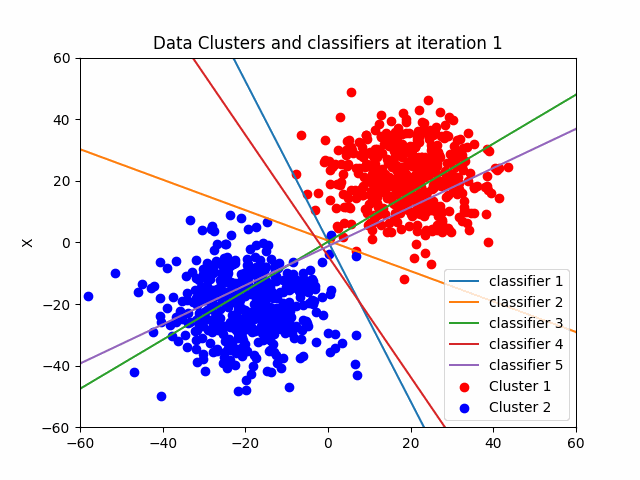

In [417]:
from IPython.display import Image, display

# Display the GIF
display(Image(filename='gifs/admm.gif'))

# bistage

## Centralized

In [153]:
def f1(X):
    return 2*(X[0]-1)**2 + (X[1]-X[2])**2+ (X[2]-1)**2 + 2.5*(X[3]+2)**2
    
def f2(X):
    return (X[0]-1)**2 + 2*(X[1]-3)**2+ 2*(X[2]+X[1])**2 + 0.5*(X[3]-2)**2
    
def f3(X):
    return (X[0]-1)**2 + (X[1]-3)**2+ 2*(X[2]-X[1])**2 + 0.5*(X[3]+X[0])**2

all_f = [f1,f2,f3]
def f_sum(X):
    Sum = 0.0
    for i in range(len(all_f)):
        f_input = np.concatenate((X[2*i:2*(i+1)], X[-2:]))
        Sum += all_f[i](f_input)
    return Sum

In [122]:
def compute_gradient(X, f_for_grad):
    N_dim = X.shape[0]
    gradient_vector = np.zeros_like(X)
    h = 1e-3
    for i in range(N_dim):
        x_plus_h = X.copy()
        x_plus_h[i] += h

        x_minus_h = X.copy()
        x_minus_h[i] -= h

        gradient_vector[i] = (f_for_grad(x_plus_h) - f_for_grad(x_minus_h)) / (2 * h)
    return gradient_vector

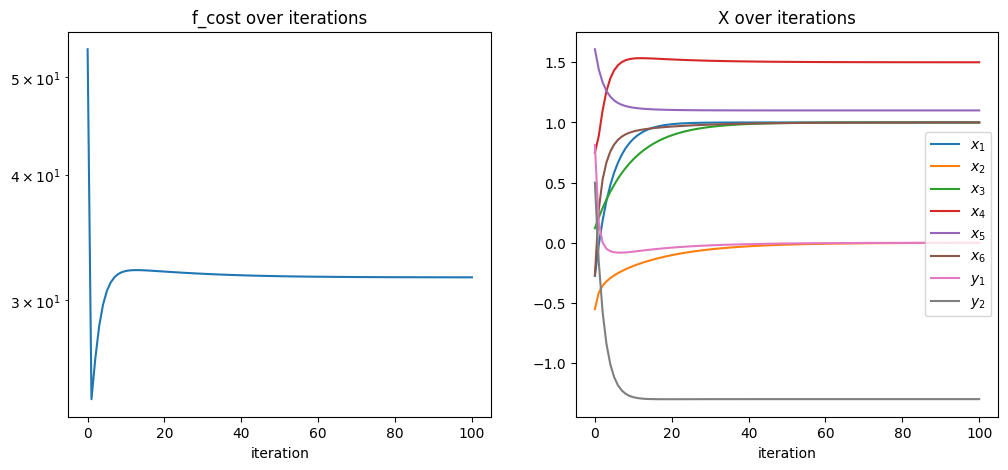

In [138]:
X_init = np.random.normal(size=8)
X_list = [X_init.copy()]
f_list = [f_sum(X_init)]
X_current = X_list[-1].copy()

for i in range(100):
    gradient_vector = compute_gradient(X_current, f_sum)
    X_current = X_current - 0.05*gradient_vector
    
    X_list.append(X_current.copy())
    f_list.append(f1(X_current))
fig, axes = plt.subplots(1, 2, figsize=(12,5))     
axes[0].semilogy(f_list);
axes[0].title.set_text('f_cost over iterations')
axes[0].set_xlabel('iteration')
axes[1].plot(X_list);
axes[1].title.set_text('X over iterations')
axes[1].set_xlabel('iteration')
axes[1].legend(['$x_1$','$x_2$','$x_3$','$x_4$','$x_5$','$x_6$','$y_1$','$y_2$',])

## primal

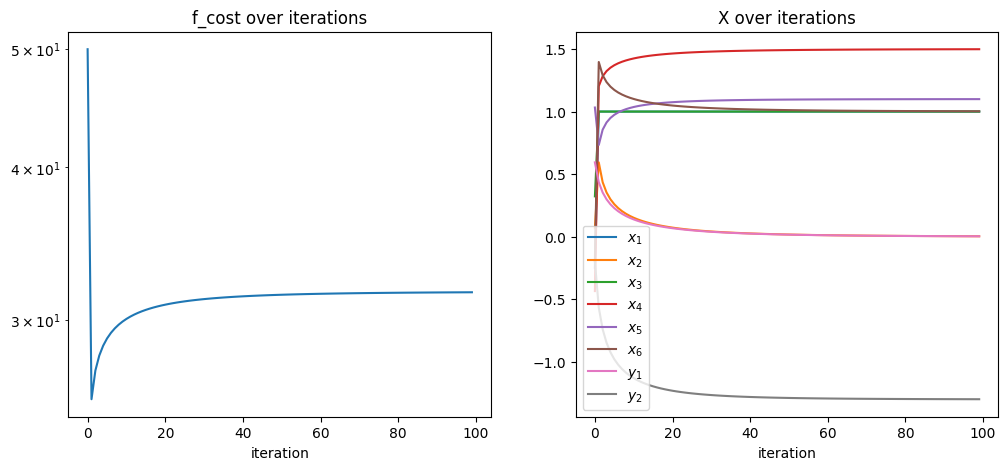

In [156]:
n_agent = 3

X_init = np.random.normal(size=8)
X_list = [X_init.copy()]
f_list = [f_sum(X_init)]
X_current = X_list[-1].copy()

for i in range(1,100):
    for j in range(100):
        for n in range(n_agent):
            grad_input = np.concatenate((X_current[2*n:2*(n+1)], X_current[-2:]))
            gradient_vector = compute_gradient(grad_input, all_f[n])
            X_current[2*n:2*(n+1)] = X_current[2*n:2*(n+1)] - (0.05/i**0.5)*gradient_vector[:2]
    
    
    gradient_vector = compute_gradient(X_current, f_sum)
    X_current[-2:] = X_current[-2:] - (0.05/i**0.5)*gradient_vector[-2:]        
        
    X_list.append(X_current.copy())
    f_list.append(f1(X_current))
fig, axes = plt.subplots(1, 2, figsize=(12,5))    
axes[0].semilogy(f_list);
axes[0].title.set_text('f_cost over iterations')
axes[0].set_xlabel('iteration')
axes[1].plot(X_list);
axes[1].title.set_text('X over iterations')
axes[1].set_xlabel('iteration')
axes[1].legend(['$x_1$','$x_2$','$x_3$','$x_4$','$x_5$','$x_6$','$y_1$','$y_2$',])

In [157]:
decay_sqrt_k = f_list


In [155]:
decay_k = f_list


In [144]:
const_step = f_list

In [140]:
const_alpha = f_list

Text(0.5, 0, 'iteration')

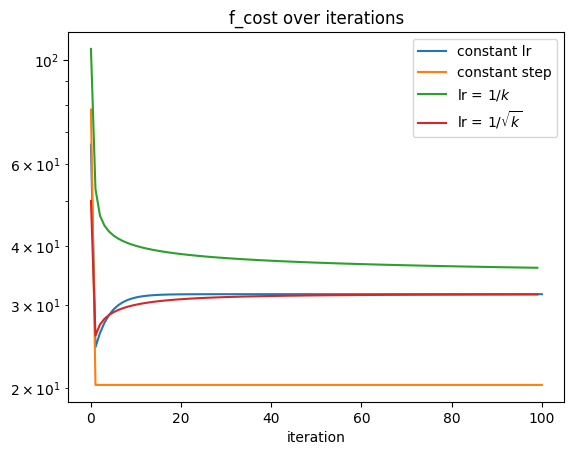

In [158]:
plt.semilogy(const_alpha,label = "constant lr")
plt.semilogy(const_step,label = "constant step")
plt.semilogy(decay_k,label = "lr = $1/k$")
plt.semilogy(decay_sqrt_k,label = "lr = $1/\sqrt{k}$")

plt.legend()
plt.title('f_cost over iterations')
plt.xlabel('iteration')